In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"
path_files = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Files/"
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils

# Indice

- [Import and read](#import)
- [Hashtags](#hashtags)
- [URLs shared](#urls)
- [Split](#split)
- [Retweet network - Leiden](#nt_l)
- [Retweet network - Louvain](#nt_l2)
- [YouTube](#yt)
- [Credibility Domains shared](#cred)
- [Most popular tweets](#popular)
- [Media shared](#media)

# Import and read Data
<a id="import"/>

In [2]:
good = pd.read_csv(path + "good.csv")
bad = pd.read_csv(path + "bad.csv")
good_lst = list(good["screen_name"])
bad_lst = list(bad["screen_name"])
good_rt = pd.read_csv(path_df + "good_rt.csv")
bad_rt = pd.read_csv(path_df + "bad_rt.csv")
good_lst = list(good["screen_name"])
bad_lst = list(bad["screen_name"])
good_rt_lst = list(good_rt["screen_name"])
bad_rt_lst = list(bad_rt["screen_name"])

In [3]:
# df = pd.read_parquet(path_df + "tweets.parquet", engine="fastparquet")
# good_activities = df[df["user_screen_name"].isin(good_lst)]
# bad_activities = df[df["user_screen_name"].isin(bad_lst)]
# rt_in_good = df[df["rt_user_screen_name"].isin(good_lst)]
# rt_in_bad = df[df["rt_user_screen_name"].isin(bad_lst)]
# good_activities.to_csv(path_df + "good_activities.csv", encoding="utf-8", line_terminator="\n", index=False)
# bad_activities.to_csv(path_df + "bad_activities.csv", encoding="utf-8", line_terminator="\n", index=False)
# rt_in_bad.to_csv(path_df + "rt_in_bad.csv", encoding="utf-8", line_terminator="\n", index=False)
# rt_in_good.to_csv(path_df + "rt_in_good.csv", encoding="utf-8", line_terminator="\n", index=False)

In [3]:
good_activities = pd.read_csv(path_df + "good_activities.csv", encoding="utf-8", lineterminator="\n", low_memory=False)
bad_activities = pd.read_csv(path_df + "bad_activities.csv", encoding="utf-8", lineterminator="\n", low_memory=False)
rt_in_bad = pd.read_csv(path_df + "rt_in_bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
rt_in_good = pd.read_csv(path_df + "rt_in_good.csv", lineterminator="\n", low_memory=False, encoding="utf-8")

In [5]:
good_activities.columns

Index(['id', 'id_str', 'created_at', 'user_id', 'user_screen_name',
       'user_verified', 'user_created_at', 'text', 'source', 'coordinates',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'rt_coordinates',
       'rt_created_at', 'rt_in_reply_to_status_id', 'rt_in_reply_to_user_id',
       'rt_lang', 'rt_favourite_count', 'rt_id', 'rt_user_id',
       'rt_user_screen_name', 'rt_user_created_at', 'rt_user_verified',
       'rt_user_followers_count', 'rt_user_friends_count',
       'rt_user_favourites_count', 'quoted_status_id', 'quoted_status_text',
       'quoted_status_created_at', 'quoted_user_id', 'quoted_user_created_at',
       'hashtags', 'symbols', 'user_mentions', 'urls', 'polls', 'media',
       'user_tweets_count', 'user_friends_count', 'user_followers_count'],
      dtype='ob

# Hashtags
<a id="hashtags"/>

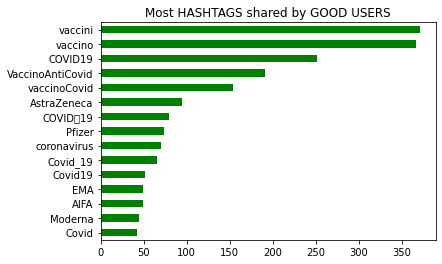

In [4]:
lst_prova = utils.hashtag_process_list(good_activities["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most HASHTAGS shared by GOOD USERS')
ax.invert_yaxis()
plt.show()

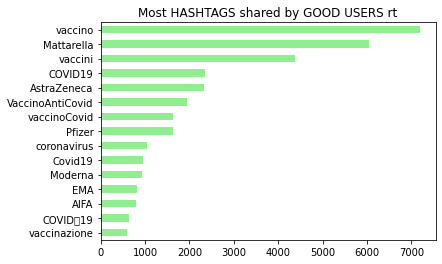

In [5]:
lst_prova = utils.hashtag_process_list(rt_in_good["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='lightgreen')
ax.set_title('Most HASHTAGS shared by GOOD USERS rt')
ax.invert_yaxis()
plt.show()

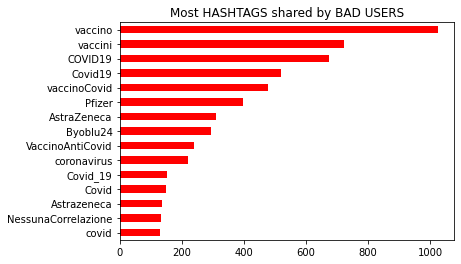

In [8]:
lst_prova = utils.hashtag_process_list(bad_activities["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='red')
ax.set_title('Most HASHTAGS shared by BAD USERS')
ax.invert_yaxis()
plt.show()

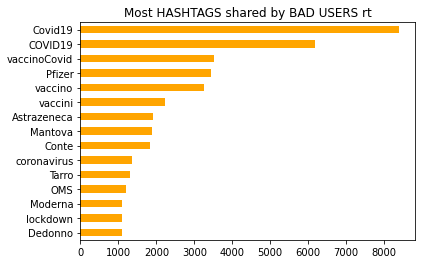

In [11]:
lst_prova = utils.hashtag_process_list(rt_in_bad["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='orange')
ax.set_title('Most HASHTAGS shared by BAD USERS rt')
ax.invert_yaxis()
plt.show()

In [6]:
hs_sage = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_hs.csv")
hs_sage_good = hs_sage[15:][["word"]].reset_index(drop=True)
hs_sage_bad = hs_sage[:16][["word"]].reset_index(drop=True)
txt_sage = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_txt.csv")
txt_sage_good = txt_sage[15:][["word"]].reset_index(drop=True)
txt_sage_bad = txt_sage[:16][["word"]].reset_index(drop=True)

In [7]:
print("SAGE")
info = []
hs_sage = list(hs_sage_good["word"])
for i in range(len(hs_sage)):
    info.append("Provax")
for i in range(len(hs_sage)):
    info.append("Novax")
hs_sage.extend(list(hs_sage_bad["word"]))
txt_sage = list(txt_sage_good["word"])
txt_sage.extend(txt_sage_bad["word"])
df_sage_info = pd.DataFrame(list(zip(info, hs_sage, txt_sage)), columns=["User", "Hashtag", "Text"])
df_sage_info

SAGE


,User,Hashtag,Text
0,Provax,medicalfacts,medicalfacts
1,Provax,lavitaindiretta,gimbe
2,Provax,robertoburioni,aiuteranno
3,Provax,ifattivostri,integrare
4,Provax,regioni,fidiamoci
5,Provax,gimbe,sbrighiamoci
6,Provax,unomattina,saturi
7,Provax,vaccinale,regolatorie
8,Provax,decretoriaperture,consegnate
9,Provax,forrest,sintomatica


# URLs Shared
<a id="urls"/>

In [45]:
# tweets_with_urls = pd.read_parquet(path_df+"tweets_with_urls_and_domain_and_score (4.0).parquet", engine="fastparquet")
# tweets_with_urls
import importlib
importlib.reload(utils)

<module 'utils' from 'C:\\Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils\\utils.py'>

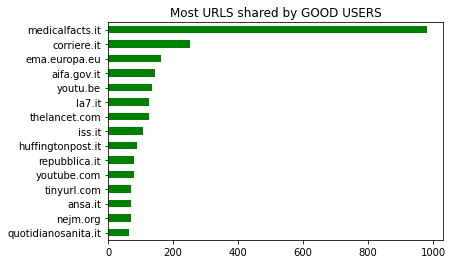

In [20]:
x = utils.extract_domain_list(good_activities)
good_urls = []
lst_not_plot = ["twitter.com", "bit.ly", "ow.ly"]
cont = 0
for i in x:
    if i != []:
        for j in i:
            if (j not in lst_not_plot):
                good_urls.append(j)
val = pd.Series(good_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='green')
ax.set_title('Most URLS shared by GOOD USERS')
ax.invert_yaxis()
plt.show()

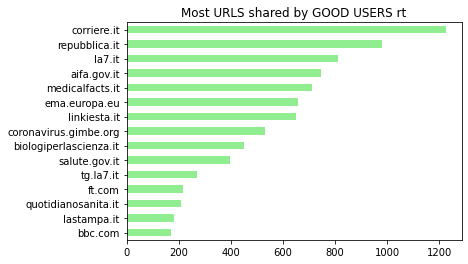

In [26]:
x = utils.extract_domain_list(rt_in_good)
good_urls = []
cont = 0
for i in x:
    if i != []:
        for j in i:
            if (j not in lst_not_plot):
                good_urls.append(j)
val = pd.Series(good_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='lightgreen')
ax.set_title('Most URLS shared by GOOD USERS rt')
ax.invert_yaxis()
plt.show()

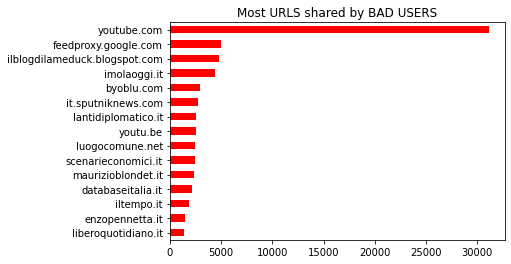

In [27]:
x = utils.extract_domain_list(bad_activities)
bad_urls = []
cont = 0
for i in x:
    if i != []:
        for j in i:
            if (j not in lst_not_plot):
                bad_urls.append(j)
val = pd.Series(bad_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='red')
ax.set_title('Most URLS shared by BAD USERS')
ax.invert_yaxis()
plt.show()

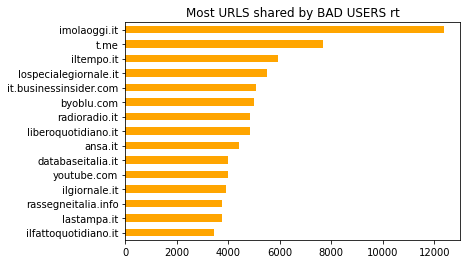

In [29]:
x = utils.extract_domain_list(rt_in_bad)
bad_urls = []
cont = 0
for i in x:
    if i != []:
        for j in i:
            if (j not in lst_not_plot):
                bad_urls.append(j)
val = pd.Series(bad_urls).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='orange')
ax.set_title('Most URLS shared by BAD USERS rt')
ax.invert_yaxis()
plt.show()

# Split
<a id="split"/>

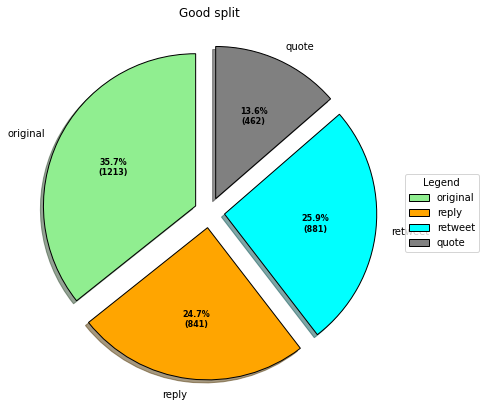

In [23]:
x = utils.split(good_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Good split", labels, values)

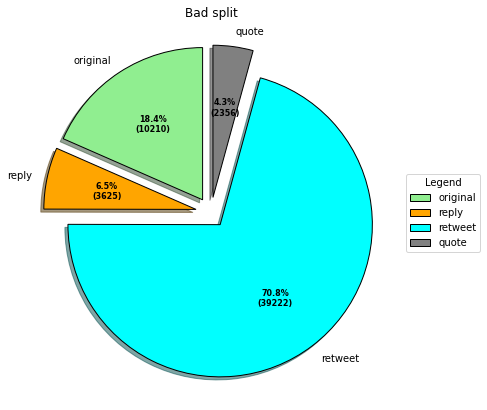

In [24]:
x = utils.split(bad_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Bad split", labels, values)

# Rt network - Leiden
<a id="nt_l"/>

In [11]:
leiden = pd.read_csv(path_files + "leiden.csv")
pd.Series(leiden[leiden["user"].isin(bad_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

2       12606
4         332
3         320
1         235
5         193
        ...  
2589        1
3189        1
1169        1
271         1
353         1
Name: community, Length: 100, dtype: int64

In [12]:
pd.Series(leiden[leiden["user"].isin(good_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

0       25727
3        2816
1        2463
4        1897
7         166
        ...  
349         1
1031        1
214         1
777         1
38          1
Name: community, Length: 114, dtype: int64

# Rt network - Louvain
<a id="nt_l2"/>

In [8]:
louvain = pd.read_csv(path_files + "louvain.csv")
pd.Series(louvain[louvain["name"].isin(bad_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

4       12844
3         455
2         206
0         198
34        174
        ...  
3382        1
3481        1
3493        1
361         1
3583        1
Name: community, Length: 61, dtype: int64

In [26]:
pd.Series(louvain[louvain["name"].isin(good_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

0       25394
3        3458
2        3258
5         746
1         217
        ...  
619         1
2691        1
144         1
2867        1
126         1
Name: community, Length: 113, dtype: int64

# YouTube
<a id="yt"/>

In [13]:
# tweets = pd.read_parquet(path_df + "tweets.parquet", engine = "fastparquet")
# import emoji
# lst = []
# for i in tqdm(tweets[tweets["text"]!="[]"][["id","text","user_screen_name"]].itertuples()):
#     for c in i.text:
#         if c in emoji.UNICODE_EMOJI['en']:
#             lst.append(i.user_screen_name)
# x = pd.Series(lst).value_counts().sort_values(ascending=False).keys()
# print(len(x))
# bad_count = 0
# good_count = 0
# for i in tqdm(list(x)):
#     if (i in bad_lst) | (i in bad_rt_lst):
#         bad_count = bad_count + 1
#     elif (i in good_lst) | (i in good_rt_lst):
#         good_count = good_count + 1
# print(good_count)
# print(bad_count)

In [30]:
# tweets = pd.read_parquet(path_df + "tweets_with_urls_and_domain_and_score (3.0).parquet", engine = "fastparquet")
# yt_df = pd.read_csv(path + "youtube_info.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# yt_df

In [9]:
# tweets = pd.read_parquet(path_df + "tweets.parquet", engine="fastparquet")
# yt_df = tweets[(tweets["urls"].str.contains("https://youtu.be")) | (tweets["urls"].str.contains("https://youtube"))]
# value = []
# for i in tqdm(yt_df["urls"]):
#     url_exp = i.split(" ")
#     lst_inside = []
#     for exp in range(len(url_exp)):
#         if url_exp[exp] == "'expanded_url':":
#             lst_inside.append(url_exp[exp+1][1:-2])
#     value.append(lst_inside)
# yt_df["domains"] = value
# yt_df
yt_df.to_csv("C:/Users/gianl/Desktop/Gi/dataset_prova.csv", line_terminator="\n", index=False, encoding="utf-8")

In [54]:
yt_df = pd.read_csv(path_df + "yt_info.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
yt_df.sort_values(by=["occurrency"], ascending=False)

,screen_name,url,title,description,type,available,reason,occurrency
9312,IacobellisT,https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
806,TommyBrain,https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
9231,IacobellisT,https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
9230,TommyBrain,https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
9203,IacobellisT,https://www.youtube.com/watch?v=U-kC9XkT7Eo,I LOCKDOWNS: DISTRUGGERANNO PIU' VITE DI QUANT...,Intervista all'epidemiologa di punta della Har...,decompressed,True,Parsed,508
...,...,...,...,...,...,...,...,...
1454,AjaccioRose,https://youtu.be/sGqvFf9VY8Y,On a pas assez de données sur la sécurité des ...,👉 La chaîne à besoin de votre soutien\n-Abonne...,compressed,True,Parsed,1
12101,corra_franco,https://youtu.be/5vi5rX_OOuY,anni 70 magnifici quanto costava,Negli anni 70 non avevamo le tecnologie di ogg...,compressed,True,Parsed,1
1456,EInformazione,https://www.youtube.com/post/Ugxmb2LyWc6C3epJW...,NaN,NaN,decompressed,True,Profile,1
8693,G_Chinellato,https://youtu.be/GZ_qRu-P3W8,NaN,NaN,compressed,False,Unavailable,1


In [37]:
bad_yt = yt_df[yt_df["screen_name"].isin(bad_lst)]
pd.Series(bad_yt["reason"]).value_counts().sort_values(ascending=False).values
print(f"Availability: {round(2948/3713,2)*100}%")

Availability: 79.0%


In [39]:
good_yt = yt_df[yt_df["screen_name"].isin(good_lst)]
pd.Series(good_yt["reason"]).value_counts().sort_values(ascending=False).values
print(f"Availability: {round(21/24,2)*100}%")

Availability: 88.0%


In [42]:
good_yt.to_csv(path_files + "good_yt.csv", encoding="utf-8", line_terminator="\n", index=False)
bad_yt.to_csv(path_files + "bad_yt.csv", encoding="utf-8", line_terminator="\n", index=False)

# Title SGAE

In [57]:
sage_title = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_titles.csv")
for i in range(len(sage_title["word"])):
    print(sage_title["word"][i])
    if i == 14:
        print("-----")

vaccini
vaccino
immunità
lockdowns
gregge
distruggeranno
piu
che
salvano
vite
top
immunita
incognite
harvard
sputnik
-----
congiunta
presidente
barbara
direttore
aifa
gallavotti
bianca
tutte
zona
sardegna
altre
generale
diretta
vive
conferenza


# Credibility
<a id="cred"/>

In [4]:
cred_user = pd.read_csv(path_files + "result_cred_score_thresh_20.csv", lineterminator="\n")
cred_user

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
0,infoitinterno,17471,12,17267,192,0,1.0
1,Alberto25090565,212,0,106,0,106,1.0
2,contro_informa,27,0,27,0,0,1.0
3,Libero_official,451,0,451,0,0,1.0
4,FrontieraRieti,44,0,42,2,0,1.0
...,...,...,...,...,...,...,...
5218,LucaBraia,20,0,0,17,3,NaN
5219,AodiFoad,20,0,0,13,7,NaN
5220,ArturoMarghera,20,0,0,20,0,NaN
5221,AriaPulitaER,20,0,0,20,0,NaN


In [5]:
merge_bad = bad.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")
merge_good = good.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")
merge_bad_rt = bad_rt.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")
merge_good_rt = good_rt.merge(cred_user, left_on="screen_name", right_on="user_screen_name", how="left")

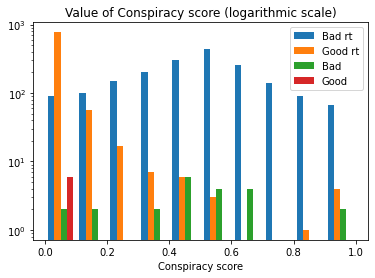

In [6]:
plt.hist([merge_bad_rt["conspiracy_score"], 
          merge_good_rt["conspiracy_score"],
          merge_bad["conspiracy_score"], 
          merge_good["conspiracy_score"]],
          label=['Bad rt', 'Good rt', 'Bad', 'Good'])
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

#### Conspiracy - Network

In [9]:
merged_louvain = louvain.merge(cred_user, left_on="name", right_on="user_screen_name", how="left")
merged_louvain_bad = merged_louvain[merged_louvain["community"]==4]
merged_louvain_good = merged_louvain[merged_louvain["community"]==0]
merged_louvain_influencer = merged_louvain[merged_louvain["community"]==2]
merged_louvain_paper = merged_louvain[merged_louvain["community"]==3]

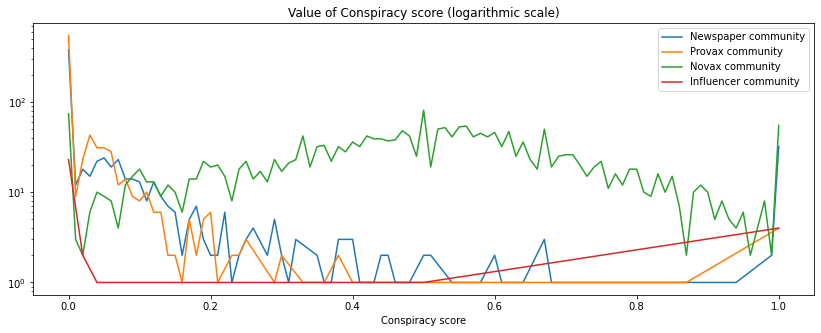

In [10]:
# Line plot
x = pd.Series(merged_louvain_paper["conspiracy_score"]).value_counts().sort_index(ascending=False)
x2 = pd.Series(merged_louvain_good["conspiracy_score"]).value_counts().sort_index(ascending=False)
x3 = pd.Series(merged_louvain_bad["conspiracy_score"]).value_counts().sort_index(ascending=False)
x4 = pd.Series(merged_louvain_influencer["conspiracy_score"]).value_counts().sort_index(ascending=False)
plt.plot(list(x.keys()), list(x.values), label="Newspaper community")
plt.plot(list(x2.keys()), list(x2.values), label="Provax community")
plt.plot(list(x3.keys()), list(x3.values), label="Novax community")
plt.plot(list(x4.keys()), list(x4.values), label="Influencer community")

plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

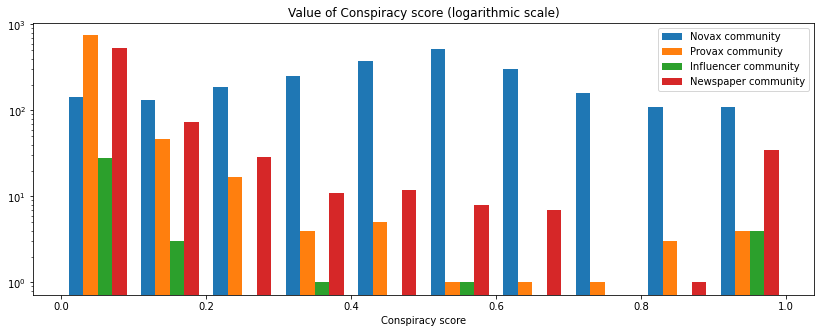

In [11]:
#Histogram
plt.hist([merged_louvain_bad["conspiracy_score"], 
          merged_louvain_good["conspiracy_score"],
          merged_louvain_influencer["conspiracy_score"],
          merged_louvain_paper["conspiracy_score"]],
          label=['Novax community', 'Provax community', "Influencer community", "Newspaper community"])
plt.legend(loc='upper right')
plt.title("Value of Conspiracy score (logarithmic scale)")
plt.yscale('log', nonposy='clip')
plt.xlabel("Conspiracy score")
plt.rcParams["figure.figsize"] = (14,5)
plt.show()

# Most popular Tweets
<a id="popular"/>

In [10]:
good_activities.sort_values(by='retweet_count', ascending=False)[["id","created_at","user_screen_name","text","retweet_count"]]

,id,created_at,user_screen_name,text,retweet_count
2393,1371916524269809665,Tue Mar 16 20:09:23 +0000 2021,Cartabellotta,Se avessimo avuto paura del Covid quanta ne ab...,3322
2345,1371604640240918529,Mon Mar 15 23:30:04 +0000 2021,WRicciardi,Se avessimo avuto paura del Covid quanta ne ab...,3322
653,1236412021765218306,Sat Mar 07 22:02:52 +0000 2020,RobertoBurioni,Non sono stato mai disfattista ma è difficile ...,2707
2173,1369246283983126532,Tue Mar 09 11:18:48 +0000 2021,Quirinale,Il Presidente #Mattarella essendo in corso a R...,2135
384,1344731092243378178,Thu Dec 31 19:44:10 +0000 2020,Quirinale,"#Mattarella: Io mi vaccinerò appena possibile,...",1689
...,...,...,...,...,...
1928,1366476250542444553,Mon Mar 01 19:51:40 +0000 2021,DarioBressanini,@micarie75 @ValeVetinari @Paolo_Perini83 già. ...,0
1925,1366442572944670721,Mon Mar 01 17:37:51 +0000 2021,ScaltritiLab,"@CiccioIlBrillo Franscesco, informati, AZ non ...",0
1924,1366440558634430465,Mon Mar 01 17:29:51 +0000 2021,ScaltritiLab,@CiccioIlBrillo lavoro per una casa farmaceuti...,0
931,1345070523722698752,Fri Jan 01 18:12:57 +0000 2021,MedBunker,@AleMed85 Vaccinare prima gli operatori sanita...,0


In [13]:
bad_activities.sort_values(by='retweet_count', ascending=False)[["id","created_at","user_screen_name","text","retweet_count"]][:10]

,id,created_at,user_screen_name,text,retweet_count,rt_id
42269,1388103470025150464,Fri Apr 30 12:10:31 +0000 2021,CarpaneseSilva1,"Cari Signori Giornalisti, questa mattina il Pr...",1757,1.388039e+18
42318,1388177652150853632,Fri Apr 30 17:05:18 +0000 2021,xenonian1,"Cari Signori Giornalisti, questa mattina il Pr...",1757,1.388039e+18
42432,1388215688079323137,Fri Apr 30 19:36:26 +0000 2021,MarySpes,"Cari Signori Giornalisti, questa mattina il Pr...",1757,1.388039e+18
42202,1388057630246117376,Fri Apr 30 09:08:22 +0000 2021,lucabattanta,"Cari Signori Giornalisti, questa mattina il Pr...",1756,1.388039e+18
42196,1388048915367448577,Fri Apr 30 08:33:44 +0000 2021,Z3r0Rules,"Cari Signori Giornalisti, questa mattina il Pr...",1756,1.388039e+18
49331,1388990180804239360,Sun May 02 22:53:59 +0000 2021,marchesaangeli,"Cari Signori Giornalisti, questa mattina il Pr...",1721,1.388039e+18
50270,1389442985667055616,Tue May 04 04:53:17 +0000 2021,a_meluzzi,"Cari Signori Giornalisti, questa mattina il Pr...",1721,1.388039e+18
11854,1262771202227081216,Tue May 19 15:44:50 +0000 2020,CarpaneseSilva1,#Tarro suggerisce il plasma: lo diffamano.\n#D...,1552,1.256944e+18
10662,1257006383582584832,Sun May 03 17:57:30 +0000 2020,CarpaneseSilva1,#Tarro suggerisce il plasma: lo diffamano.\n#D...,1552,1.256944e+18
10704,1256949103050842112,Sun May 03 14:09:53 +0000 2020,fdragoni,#Tarro suggerisce il plasma: lo diffamano.\n#D...,1552,1.256944e+18


# Media shared
<a id="media"/>

In [12]:
medias = bad_activities[bad_activities["media"]!="[]"]["media"]
media = []
for i in medias:
    for j in (i.split(",")):
        if "expanded_url" in j:
           media.append(j.split("/")[6])
print(f"Media shared on total tweets: {round(len(media)/len(bad_activities),2)*100}%, {len(media)} on {len(bad_activities)}")
pd.Series(media).value_counts().sort_values(ascending=False)

Media shared on total tweets: 4.0%, 2075 on 55372


photo    1794
video     281
dtype: int64

In [33]:
medias = good_activities[good_activities["media"]!="[]"]["media"]
media = []
for i in medias:
    for j in (i.split(",")):
        if "expanded_url" in j:
           media.append(j.split("/")[6])
print(f"Media shared on total tweets: {round(len(media)/len(good_activities),2)*100}%, {len(media)} on {len(good_activities)}")
pd.Series(media).value_counts().sort_values(ascending=False)

Media shared on total tweets: 19.0%, 645 on 3400


photo    630
video     15
dtype: int64

In [15]:
pd.Series(good_activities["user_screen_name"]).value_counts().sort_values(ascending=False)

Cartabellotta      878
RobertoBurioni     734
GIMBE              290
ScaltritiLab       227
GiacomoGorini      221
BiologiScienza     170
MedBunker          142
DrMCecconi         135
WRicciardi         116
MedicalFactsIT      81
istsupsan           64
Aifa_ufficiale      56
MinisteroSalute     54
antonellaviol17     50
ilariacapua         37
ProfLopalco         32
robersperanza       26
DarioBressanini     20
Palazzo_Chigi       16
bgallavotti         15
INMISpallanzani     13
ISSalute_it         11
MassimoGalli51       6
Quirinale            6
Name: user_screen_name, dtype: int64

In [14]:
pd.Series(bad_activities["user_screen_name"]).value_counts().sort_values(ascending=False)


Piero42395724      4803
IacobellisT        4333
Pietro_Otto        4123
TommyBrain         4115
Z3r0Rules          4081
xenonian1          4007
MarySpes           3815
marchesaangeli     3788
MinervaMcGrani1    3283
Sakurauchi_Hime    3267
CarpaneseSilva1    3158
lucabattanta       3093
valy_s             2813
a_meluzzi          1694
noitre32           1644
BarbaraRaval       1218
miia_2018           854
cris_cersei         752
fdragoni            191
pbecchi             149
byoblu               70
intuslegens          60
RadioSavana          35
TarroGiulio          26
Name: user_screen_name, dtype: int64